In [1]:
import pandas as pd
import os

In [2]:
def custom_figure_axis(ax, fontsize=10, show_ticks = True, rotation=90):
    
        
    """
    Customize the appearance of matplotlib axis for a figure.
    
    Parameters:
        ax (matplotlib.axes._subplots.AxesSubplot): The axis to be customized.
        fontsize (int, optional): Font size for axis labels and ticks. Default is 10.
        show_ticks (bool, optional): Whether to display ticks and labels. Default is True.
    
    Returns:
        matplotlib.axes._subplots.AxesSubplot: The customized axis.
    """
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.2)
    ax.spines['left'].set_linewidth(0.2)
    ax.tick_params(axis='x', labelsize=fontsize, rotation=rotation)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.tick_params(axis='both', which='both', width=0.5)
    ax.xaxis.label.set_fontsize(fontsize)
    ax.yaxis.label.set_fontsize(fontsize)
    
    if show_ticks==False:
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
    return ax


In [3]:
# def return_extracted_info(folder_path, query_type):

#     """
#     Extracts and processes information from Excel files in a specified folder and returns two DataFrames.

#     Parameters:
#     folder_path (str): Path to the folder containing Excel files.
#     query_type (str): The type of query, used to label the extracted data.

#     Returns:
#     tuple: A tuple containing two pandas DataFrames:
#         - DataFrame 1: Contains the extracted information in wide format with columns 
#           ["Questions", "BioChirp", "BioChirp time taken (s)", "OpenAI", "Llama", "Type"].
#         - DataFrame 2: A subset of the first DataFrame with columns 
#           ["Questions", "BioChirp time taken (s)", "Type"].

#     Notes:
#     - This function processes all Excel files (.xlsx or .xls) in the specified folder.
#     - Each Excel file should have sheets named "general", "BioChirp", "OpenAI", and "Llama".
#     - The "general" sheet should contain the question and time taken in specific rows and columns.
#     - The function handles exceptions during processing and skips files that cannot be processed.
#     - The data is converted to both wide and long formats, with the long format used for internal consistency.
#     """


#     tmp = pd.DataFrame(columns = ["Questions", "BioChirp", "BioChirp time taken (s)", "OpenAI", "Llama","BioChirp returned unique entry"])
#     c = 0
#     # Iterate through each file in the folder
#     for file_name in os.listdir(folder_path):
#         # Check if the file is an Excel file
#         if file_name.endswith('.xlsx') or file_name.endswith('.xls'):
#             file_path = os.path.join(folder_path, file_name)
#             try:
#                 # Load the Excel file into a DataFrame
#                 excel_data = pd.ExcelFile(file_path)
                
#                 # print(f"Processing file: {file_name}")
#                 tmp.loc[c, "Questions"] = excel_data.parse("general") .iloc[0,1]
#                 tmp.loc[c, "Parsed values"] = excel_data.parse("general") .iloc[1,1]
#                 print(type(eval(tmp.loc[c, "Parsed values"])))
#                 tmp.loc[c, "BioChirp time taken (s)"] = excel_data.parse("general").iloc[3,1]

#                 keys_with_all = [key for key, value in eval(tmp.loc[c, "Parsed values"]).items() if value == "all"]

#                 print(keys_with_all)
                
#                 # Iterate through each sheet in the Excel file
#                 for sheet_name in ["BioChirp", "OpenAI", "Llama"]:
#                     # print(f"  Reading sheet: {sheet_name}")
#                     df = excel_data.parse(sheet_name)
#                     tmp.loc[c, sheet_name] = df.shape[0]
#                     # print(f"  Data from {sheet_name}:\n", df.head())  # Display first few rows as an example

#                     if sheet_name=="BioChirp":
#                         tmp.loc[c, "BioChirp returned unique entry"] = df.drop_duplicates(subset=keys_with_all).shape[0]
#             except Exception as e:
#                 print(f"Error processing {file_name}: {e}")

#         c = c + 1

#     # Convert from wide to long format
#     df_long = pd.melt(tmp[["Questions", "BioChirp", "OpenAI", "Llama"]], 
#                     id_vars=["Questions"], 
#                     var_name="Tool", 
#                     value_name="Row count")
#     df_long["Type"] = query_type
#     tmp["Type"] = query_type

#     # Display the long-format DataFrame
#     # print(df_long)

#     return tmp

In [4]:
def return_extracted_info(folder_path, query_type):

    """
    Extracts and processes information from Excel files in a specified folder and returns two DataFrames.

    Parameters:
    folder_path (str): Path to the folder containing Excel files.
    query_type (str): The type of query, used to label the extracted data.

    Returns:
    tuple: A tuple containing two pandas DataFrames:
        - DataFrame 1: Contains the extracted information in wide format with columns 
          ["Questions", "BioChirp", "BioChirp time taken (s)", "OpenAI", "Llama", "Type"].
        - DataFrame 2: A subset of the first DataFrame with columns 
          ["Questions", "BioChirp time taken (s)", "Type"].

    Notes:
    - This function processes all Excel files (.xlsx or .xls) in the specified folder.
    - Each Excel file should have sheets named "general", "BioChirp", "OpenAI", and "Llama".
    - The "general" sheet should contain the question and time taken in specific rows and columns.
    - The function handles exceptions during processing and skips files that cannot be processed.
    - The data is converted to both wide and long formats, with the long format used for internal consistency.
    """


    tmp = pd.DataFrame(columns = ["Questions", "BioChirp", "BioChirp time taken (s)", "OpenAI", "Llama"])
    c = 0
    # Iterate through each file in the folder
    for file_name in os.listdir(folder_path):
        # Check if the file is an Excel file
        if file_name.endswith('.xlsx') or file_name.endswith('.xls'):
            file_path = os.path.join(folder_path, file_name)
            try:
                # Load the Excel file into a DataFrame
                excel_data = pd.ExcelFile(file_path)
                
                # print(f"Processing file: {file_name}")
                tmp.loc[c, "Questions"] = excel_data.parse("general") .iloc[0,1]
                tmp.loc[c, "Parsed values"] = excel_data.parse("general") .iloc[1,1]
                # print(type(eval(tmp.loc[c, "Parsed values"])))
                tmp.loc[c, "BioChirp time taken (s)"] = excel_data.parse("general").iloc[3,1]

                keys_with_all = [key for key, value in eval(tmp.loc[c, "Parsed values"]).items() if value == "all"]

                # print(keys_with_all)
                
                # Iterate through each sheet in the Excel file
                for sheet_name in ["BioChirp", "OpenAI", "Llama"]:
                    # print(f"  Reading sheet: {sheet_name}")
                    df = excel_data.parse(sheet_name)
                    tmp.loc[c, sheet_name] = df.shape[0]
                    # print(f"  Data from {sheet_name}:\n", df.head())  # Display first few rows as an example

                    # if sheet_name=="BioChirp":
                    #     tmp.loc[c, "BioChirp returned unique entry"] = df.drop_duplicates(subset=keys_with_all).shape[0]
            except Exception as e:
                print(f"Error processing {file_name}: {e}")

        c = c + 1

    # Convert from wide to long format
    df_long = pd.melt(tmp[["Questions", "BioChirp", "OpenAI", "Llama"]], 
                    id_vars=["Questions"], 
                    var_name="Tool", 
                    value_name="Row count")
    df_long["Type"] = query_type
    tmp["Type"] = query_type

    # Display the long-format DataFrame
    # print(df_long)

    return tmp

In [6]:
direct_question_stat = return_extracted_info(folder_path = "/home/abhishekh/Downloads/BioChirp/Output/direct", query_type = "direct")

##### manually update BioChirp returned unique entry in case of duplicacy

In [7]:
direct_question_stat["BioChirp returned unique entry"] = direct_question_stat["BioChirp"]
# direct_question_stat.loc[direct_question_stat['Questions'] == "List all breast cancer drugs that function through an inhibitory mechanism of action.",'BioChirp'] = 90 
direct_question_stat.loc[direct_question_stat['Questions'] == "Which drugs with approved status target pathways related to lung cancer treatment?","BioChirp returned unique entry"] = 2  ### Question 9
# direct_question_stat.loc[direct_question_stat['Questions'] == "What is the mechanism of action for each drug targeting the Substance-P receptor (TACR1)?","BioChirp returned unique entry"] = 4  ### Question 13

direct_question_stat.loc[direct_question_stat['Questions'] == "Which targets are associated with both the Calcium signaling pathway and the cAMP signaling pathway?","BioChirp returned unique entry"] = 181 #### Question 21
direct_question_stat.loc[direct_question_stat['Questions'] == "List all breast cancer drugs that function through an inhibitory mechanism of action.","BioChirp returned unique entry"] = 90  #### Question 28

direct_question_stat.loc[direct_question_stat['Questions'] == "What is the gene associated with the Free Fatty Acid Receptor 2 (FFAR2)?","BioChirp returned unique entry"] = 1  #### Question 42

direct_question_stat.loc[direct_question_stat['Questions'] == "List all lung cancer drugs that act as inhibitors.","BioChirp returned unique entry"] = 15 #### Question 43
direct_question_stat.loc[direct_question_stat['Questions'] == "What are the common pathways for drugs with Antagonist mechanisms?","BioChirp returned unique entry"] = 186  #### Question 48
direct_question_stat.loc[direct_question_stat['Questions'] == "What pathways are associated with Approved drugs?", "BioChirp returned unique entry"] = 257  #### Question 49

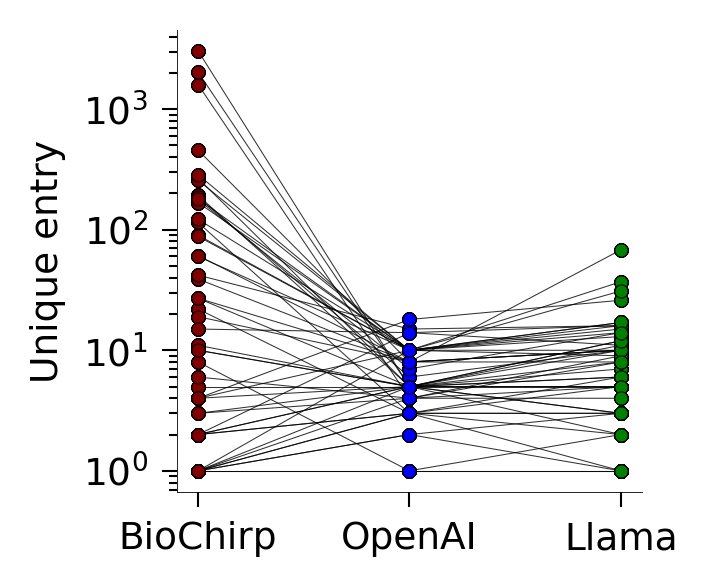

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize =(2, 2), dpi = 300)

for i in range(len(direct_question_stat)):
    ax.plot(["BioChirp", 'OpenAI', 'Llama'], [direct_question_stat.loc[i, "BioChirp returned unique entry"], direct_question_stat.loc[i, 'OpenAI'], direct_question_stat.loc[i, 'Llama']], 
         color='black', alpha=0.8, zorder=1, lw = 0.25, mew=0)
        

    sns.scatterplot(x = ['BioChirp']*len(direct_question_stat), y=direct_question_stat["BioChirp returned unique entry"], ax=ax, s=10,  color='maroon', edgecolor='black', linewidths=0.25)
    sns.scatterplot(x = ['OpenAI']*len(direct_question_stat), y=direct_question_stat['OpenAI'], ax=ax, s=10,  color='blue', edgecolor='black', linewidths=0.25)
    sns.scatterplot(x = ['Llama']*len(direct_question_stat), y=direct_question_stat['Llama'], ax=ax, s=10,  color='green', edgecolor='black', linewidths=0.25)
ax.set_ylabel("Unique entry")
ax = custom_figure_axis(ax, fontsize=9, rotation=0)
ax.set_yscale("log")
    

In [11]:
from scipy.stats import mannwhitneyu
# Perform Mann-Whitney U test
stat, p = mannwhitneyu(list(direct_question_stat["BioChirp returned unique entry"]), list(direct_question_stat["Llama"]), alternative='greater')

# Print results
print("Mann-Whitney U Statistic:", stat)
print("P-value:", p)


Mann-Whitney U Statistic: 1477.0
P-value: 0.05884019599753424


In [12]:
from scipy.stats import mannwhitneyu
# Perform Mann-Whitney U test
stat, p = mannwhitneyu(list(direct_question_stat["BioChirp returned unique entry"]), list(direct_question_stat["OpenAI"]), alternative='greater')

# Print results
print("Mann-Whitney U Statistic:", stat)
print("P-value:", p)


Mann-Whitney U Statistic: 1550.0
P-value: 0.01907591954788852


In [17]:
direct_question_stat[["BioChirp", "BioChirp returned unique entry", "OpenAI", "Llama"]].agg(["mean", "std"])

,BioChirp,BioChirp returned unique entry,OpenAI,Llama
mean,398.460000,193.240000,6.500000,10.540000
std,1548.195226,548.445989,3.813242,11.112064


In [22]:
# direct_question_stat

In [25]:
direct_question_stat[["Questions", "BioChirp", "BioChirp returned unique entry", "OpenAI", "Llama"]].to_csv("direct_question_stat.csv", index=False)